## 1. Notebook Initialization

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from random import randint

In [2]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

## 2. Preliminar Tests

In [3]:
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
#data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

,FCF,PricePerShare,ROE,Prediction
1985-03,-1.232322,-1.079314,-0.669004,13.035309
1985-06,-1.232322,-1.084088,-0.669004,13.160484
1985-09,-1.232322,-1.081432,-0.669004,16.657703
1985-12,-1.232322,-1.007231,-0.669004,16.345213
1986-03,-1.232322,-1.013861,-0.669004,15.921562
1986-06,-1.232322,-1.022850,-0.669004,14.741072
1986-09,-1.232322,-1.047896,-0.669004,13.267827
1986-12,-1.232322,-1.079154,-0.669004,16.734827
1987-03,-1.232322,-1.005595,-0.669004,18.234604
1987-06,-1.232322,-0.973774,-0.669004,17.033018


## 2.2 Scaled y dataset evaluation

In [12]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
param_grid = {
    'bootstrap': True,
    'n_jobs': -1,
    'random_state': 2021
}
rf = GridSearchCV(RandomForestRegressor(), n_jobs=-1, cv=cv, param_grid=param_grid, scoring='neg_root_mean_squared_error')
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(best_params = param_tuner(data,rf,scaling=True))

{'max_depth': 4}


In [20]:
from lib.fundamental_lib import all_grid_search
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
param_grid = {
    'bootstrap': [True],
    'n_jobs': [-1],
    'random_state': [2021],
    'n_estimators': list(range(1,51)), #list(range(100,121)),
    'min_samples_leaf': [3], #list(range(1,21)),
    'max_features': ['auto'], #['auto', 'log2', 'sqrt', 1, 2, 3],
    'oob_score': [True], #[True, False],
    'max_depth': [None], #[1,2,3,4,5,None],
}
rf = GridSearchCV(RandomForestRegressor(), n_jobs=-1, cv=cv, param_grid=param_grid, scoring='neg_root_mean_squared_error')
all_grid_search(rf, '{}_Manual_dataset.csv', PATH, stocks, 'rf', scaling=True)

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 47, 'n_jobs': -1, 'oob_score': True, 'random_state': 2021} GridSearch fit on NSC 
RMSE mean: 5.152073448020988 
 MAPE mean: 0.11796243990589066 
 MAE mean: 3.227616103204762 


{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 16, 'n_jobs': -1, 'oob_score': True, 'random_state': 2021} GridSearch fit on GL 
RMSE mean: 5.19312846457205 
 MAPE mean: 0.12053015067505604 
 MAE mean: 3.302756126783927 


{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 17, 'n_jobs': -1, 'oob_score': True, 'random_state': 2021} GridSearch fit on PEP 
RMSE mean: 5.192490874214458 
 MAPE mean: 0.1201663240025447 
 MAE mean: 3.3079892254062613 


{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 21, 'n_jobs': -1, 'oob_score': True, 'random_state': 2021} Grid

In [24]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
#Params={'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 40, 'oob_score': False}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, max_depth=Params['max_depth'], random_state=2021, min_samples_leaf=Params['min_samples_leaf'], max_features=Params['max_features'], n_estimators=Params['n_estimators'], oob_score=Params['oob_score'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('{}_Manual_dataset.csv', PATH, rf, cv=cv, scaling=True)

NSC
neg_mean_absolute_percentage_error
	mean: 0.3285067978509337	 std:0.13127702413830122


NSC
neg_root_mean_squared_error
	mean: 0.18458165902617582	 std:0.06767595316338051


GL
neg_mean_absolute_percentage_error
	mean: 0.3291454738707022	 std:0.203143778797168


GL
neg_root_mean_squared_error
	mean: 0.14092196810783875	 std:0.04307193025303331


PEP
neg_mean_absolute_percentage_error
	mean: 0.3526014022863243	 std:0.15997218123970247


PEP
neg_root_mean_squared_error
	mean: 0.140625263316177	 std:0.014912550503017149


BDX
neg_mean_absolute_percentage_error
	mean: 0.38293972154852884	 std:0.23669274077985897


BDX
neg_root_mean_squared_error
	mean: 0.11741993850412406	 std:0.02241642153878812


IBM
neg_mean_absolute_percentage_error
	mean: 0.3958878731136724	 std:0.27689064466739094


IBM
neg_root_mean_squared_error
	mean: 0.16196495678549855	 std:0.028120537567247146


MEAN MAPE: 0.35781625373403225
	 STD: 0.20159527392448431
MEAN RMSE: 0.14910275714796284
	 STD: 0.035239478605093

## 3.0 Model testing settings

In [14]:
from lib.fundamental_lib import make_dict
datas = make_dict('{}_Manual_dataset.csv', PATH)

## 3.2 Random split - Scaled prediction variable

In [12]:
param_grid = {
    'bootstrap': [True],
    'n_jobs': [-1],
    'random_state': [2021],
    'n_estimators': [119], #list(range(100,121)),
    'min_samples_leaf': [3], #list(range(1,21)),
    'max_features': ['auto'], #['auto', 'log2', 'sqrt', 1, 2, 3],
    'oob_score': [True], #[True, False],
    'max_depth': [None], #[1,2,3,4,5,None],
}
for key in param_grid.keys():
    param_grid[key] = param_grid[key][0]
print(param_grid)

{'bootstrap': True, 'n_jobs': -1, 'random_state': 2021, 'n_estimators': 119, 'min_samples_leaf': 3, 'max_features': 'auto', 'oob_score': True, 'max_depth': None}


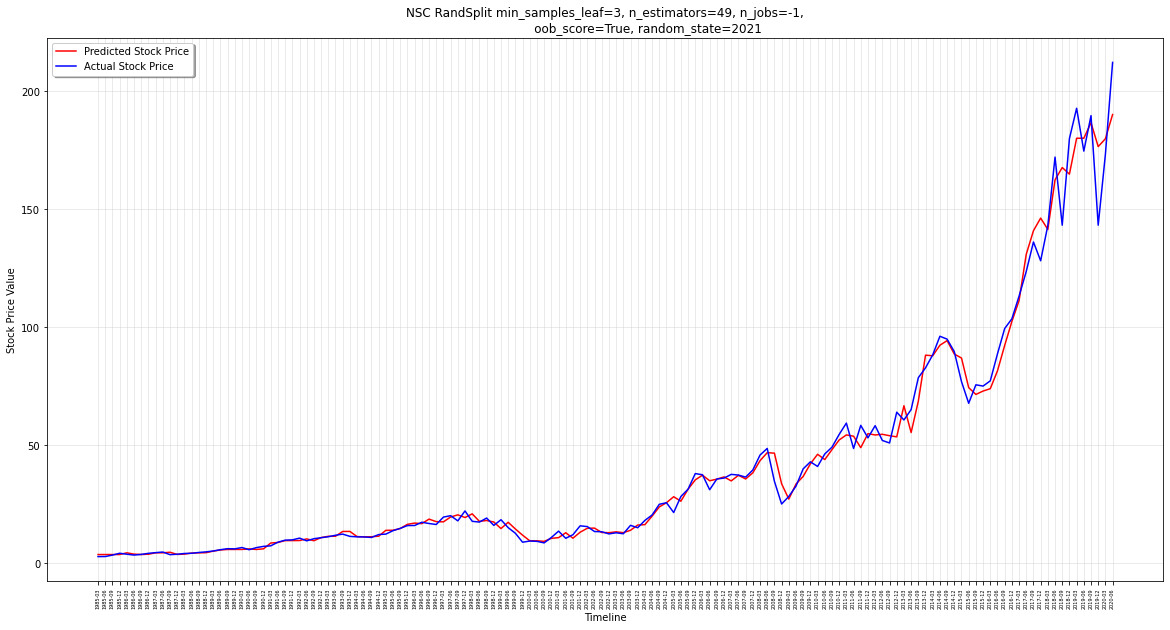

NSC MODEL RESULTS
 RMSE
 	Test: 4.632517986801268
 MAPE
 	Test: 0.11681305006981822
 MAE
 	Test: 3.0327832144785885
 R2 Score Adj
 	Test: 0.988095960320904



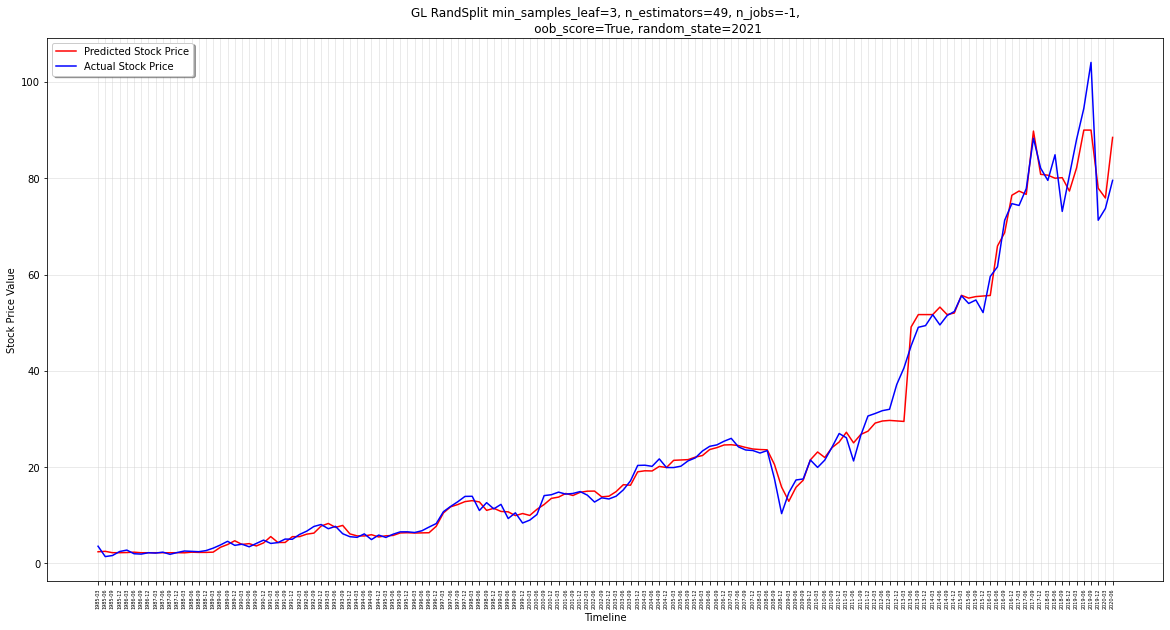

GL MODEL RESULTS
 RMSE
 	Test: 3.1222770443662475
 MAPE
 	Test: 0.13646142469526057
 MAE
 	Test: 1.9789482633945354
 R2 Score Adj
 	Test: 0.9816511656600279



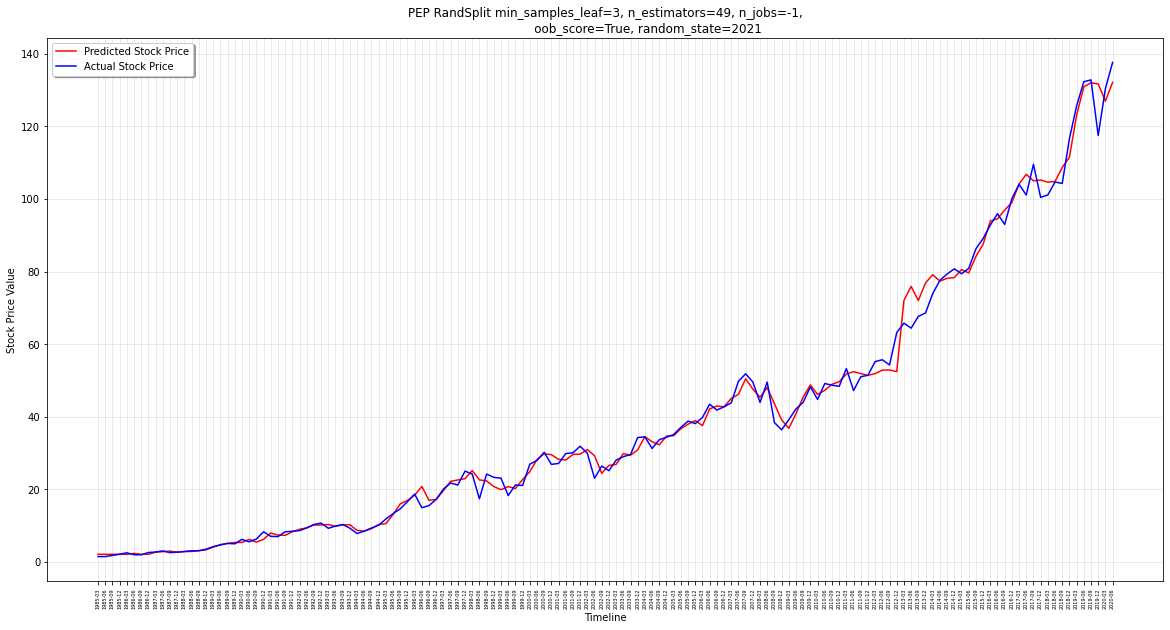

PEP MODEL RESULTS
 RMSE
 	Test: 3.679225468232521
 MAPE
 	Test: 0.10176999337813503
 MAE
 	Test: 2.2247939056629598
 R2 Score Adj
 	Test: 0.986675344610761



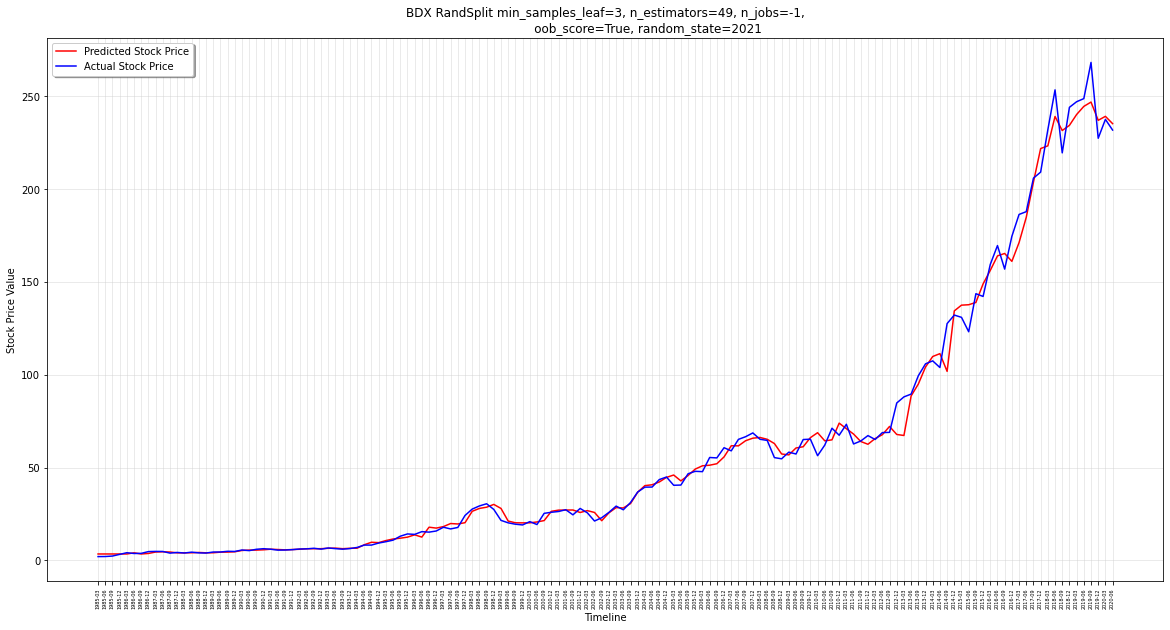

BDX MODEL RESULTS
 RMSE
 	Test: 6.736603554228854
 MAPE
 	Test: 0.12509477135723857
 MAE
 	Test: 3.9684823729267356
 R2 Score Adj
 	Test: 0.9882411615453391



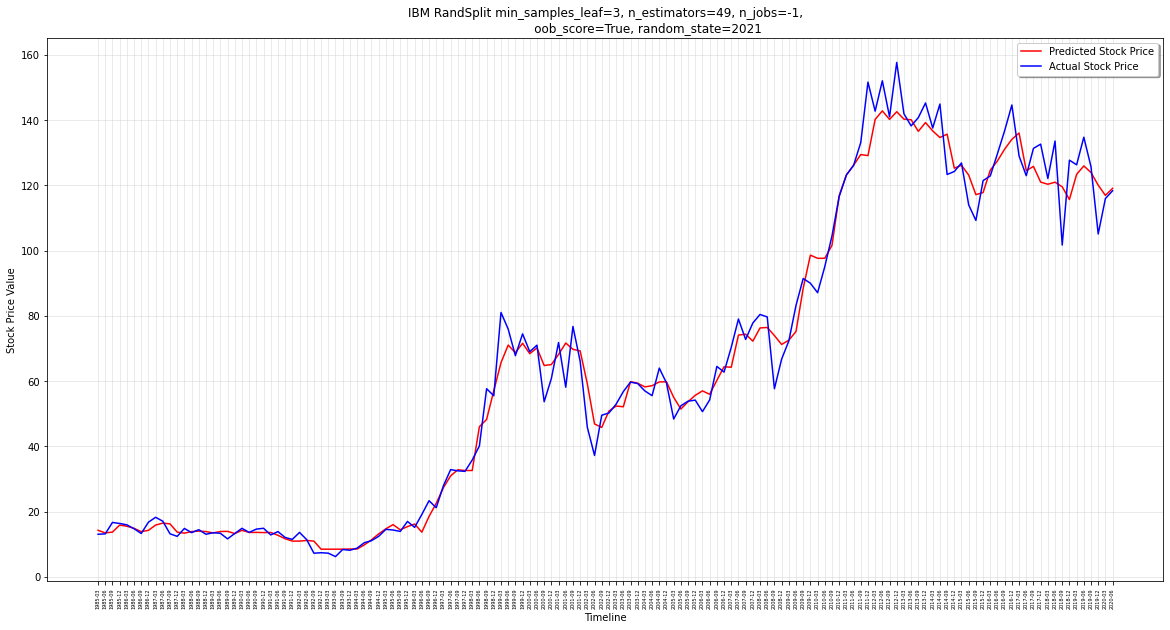

IBM MODEL RESULTS
 RMSE
 	Test: 7.353041555888136
 MAPE
 	Test: 0.10932270035441985
 MAE
 	Test: 4.8132656220997285
 R2 Score Adj
 	Test: 0.9795608091788709



In [23]:
from lib.fundamental_lib import model_results_revised
#Best Params
#Params={'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 40, 'oob_score': False} #pre
Params={'bootstrap': True, 'n_jobs': -1, 'random_state': 2021, 'n_estimators': 49, 'min_samples_leaf': 3, 'max_features': 'auto', 'oob_score': True, 'max_depth': None}
rf = RandomForestRegressor(**Params)
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_revised(datas[stock], rf, label=stock, scaling=True)